In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, FunctionTransformer, MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/student_distress_dataset.csv')
df = pd.DataFrame(df) # convert this to dataframe
df.head()

,Student ID,Age,Gender,Social Media Usage (hours/day),Social Platform Preference,Number of Notifications (per day),Sleep Duration (hours/night),Screen Time Before Sleep (hours),Mental Stress Level (0-5),Dominant Daily Emotion,Uses Focus Apps,Counselling Attendance
0,dc280ade-57f7-4815-bc1c-89a2bb6c458d,22,Male,2.13,Facebook,19,7.25,0.37,2,Neutral,False,No
1,ed73d92f-6e96-47bb-98d8-bc4d5ad19a9b,19,Male,1.66,Instagram,21,6.08,0.57,1,Neutral,True,No
2,dba583fc-42a0-4fda-a8e5-bf54a31d7787,28,Male,2.15,Telegram,27,6.78,0.51,2,Boredom,False,No
3,9c1cf026-ef3a-473b-a5e9-730da15554f9,30,Female,3.79,Facebook,38,7.14,1.88,2,Neutral,True,No
4,ff15bbcf-05e0-43d1-87f2-18c4ec1cedf4,26,Female,2.78,Twitter,24,6.35,0.89,3,Sad,False,No


In [ ]:
print(f' The shape of the dataset is {df.shape}')

 The shape of the dataset is (1000, 12)


In [ ]:
 print(f' The sum of the null values in each column are \n{df.isna().sum()}')

 The sum of the null values in each column are 
Student ID                           0
Age                                  0
Gender                               0
Social Media Usage (hours/day)       0
Social Platform Preference           0
Number of Notifications (per day)    0
Sleep Duration (hours/night)         0
Screen Time Before Sleep (hours)     0
Mental Stress Level (0-5)            0
Dominant Daily Emotion               0
Uses Focus Apps                      0
Counselling Attendance               0
dtype: int64


In [ ]:
df.info()# the column details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student ID                         1000 non-null   object 
 1   Age                                1000 non-null   int64  
 2   Gender                             1000 non-null   object 
 3   Social Media Usage (hours/day)     1000 non-null   float64
 4   Social Platform Preference         1000 non-null   object 
 5   Number of Notifications (per day)  1000 non-null   int64  
 6   Sleep Duration (hours/night)       1000 non-null   float64
 7   Screen Time Before Sleep (hours)   1000 non-null   float64
 8   Mental Stress Level (0-5)          1000 non-null   int64  
 9   Dominant Daily Emotion             1000 non-null   object 
 10  Uses Focus Apps                    1000 non-null   bool   
 11  Counselling Attendance             1000 non-null   object

In [ ]:
print(f'the number of duplicates in the dataset is {df.duplicated().sum()}')

the number of duplicates in the dataset is 0


In [ ]:
# Dropping the Student ID  from the dataset
df= df.drop(columns = 'Student ID', inplace= False)
# Example: replace “Prefer not to say” with NaN so it can be imputed or dropped
df['Gender'] = df['Gender'].replace('Prefer not to say', pd.NA)
# Then, for any categorical:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

print(f'The Student ID is successfully droped \nThe prefer not in say values in the Gender have been successfully replaced')

The Student ID is successfully droped 
The prefer not in say values in the Gender have been successfully replaced


In [ ]:
# Loop through all object‑type columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    counts = df[col].value_counts()
    print(f"The unique values in the column '{col}' are:\n{counts}\n")


The unique values in the column 'Gender' are:
Gender
Female    555
Male      445
Name: count, dtype: int64

The unique values in the column 'Social Platform Preference' are:
Social Platform Preference
WhatsApp     212
Instagram    197
TikTok       187
Facebook     158
Telegram     106
Twitter       91
Snapchat      49
Name: count, dtype: int64

The unique values in the column 'Dominant Daily Emotion' are:
Dominant Daily Emotion
Boredom     303
Neutral     291
Sad         172
Happy       162
Stressed     72
Name: count, dtype: int64

The unique values in the column 'Counselling Attendance' are:
Counselling Attendance
No     757
Yes    243
Name: count, dtype: int64



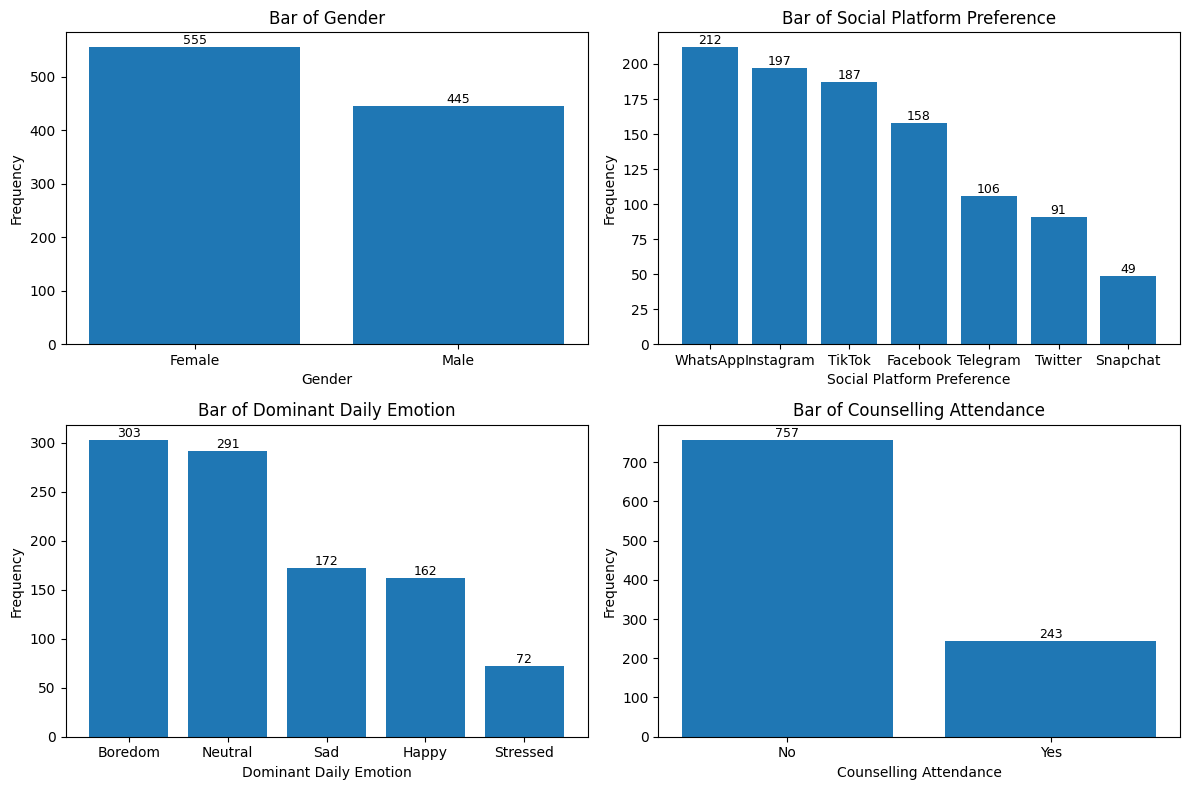

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

for i, col in enumerate(categorical_columns[:4]):  # Limits to 4 columns max
    counts = df[col].value_counts()
    bars = axs[i].bar(x=counts.index, height=counts.values)

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        axs[i].text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',  # You can format this as needed
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

    axs[i].set_title(f"Bar of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

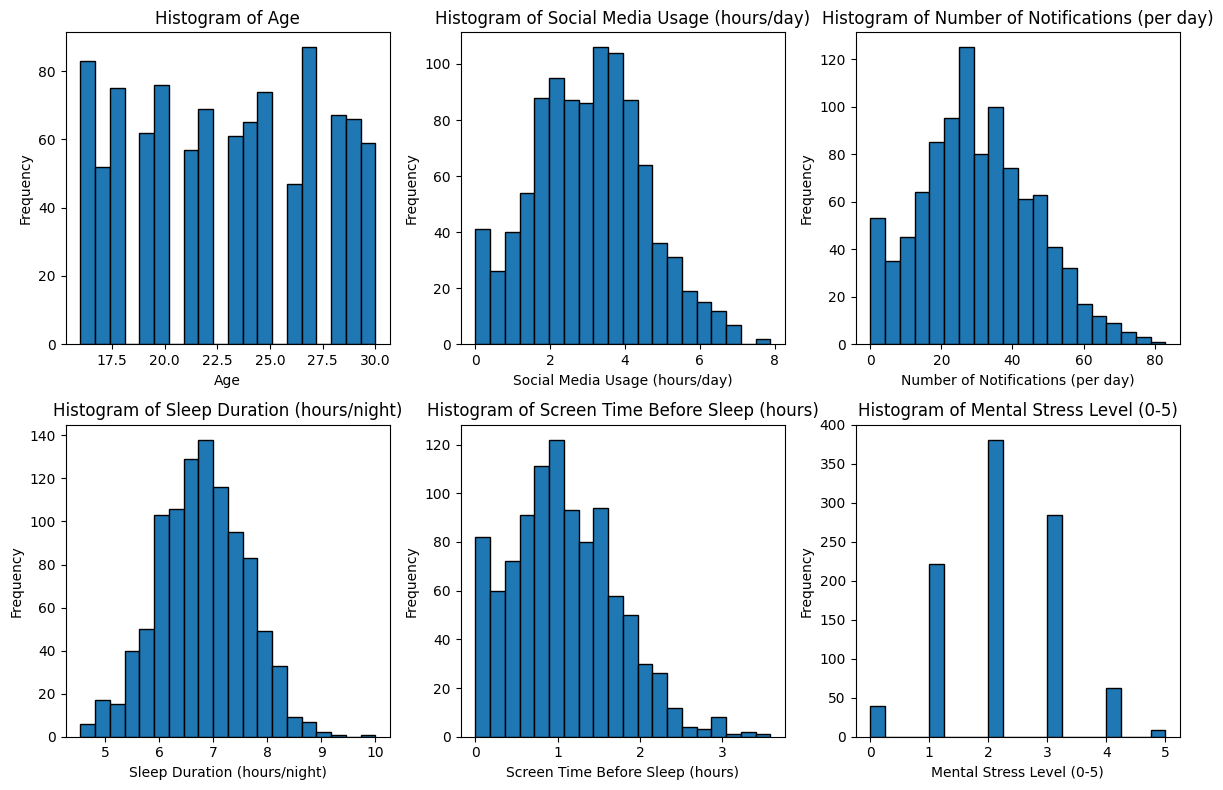

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
numeric_cols = df.select_dtypes(include="number")
for i, col in enumerate(numeric_cols[:6]):  # Adjust to fit subplot layout
    axs[i].hist(x=df[col], bins=20, edgecolor='black')
    axs[i].set_title(f"Histogram of {col}")
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Age,Social Media Usage (hours/day),Number of Notifications (per day),Sleep Duration (hours/night),Screen Time Before Sleep (hours),Mental Stress Level (0-5)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,22.919000,3.050840,30.409000,6.790530,1.072730,2.136000
std,4.349409,1.486617,15.951369,0.806123,0.645523,0.991205
min,16.000000,0.000000,0.000000,4.540000,0.000000,0.000000
25%,19.000000,1.980000,19.000000,6.230000,0.607500,1.000000
50%,23.000000,3.045000,29.000000,6.780000,1.010000,2.000000
75%,27.000000,4.092500,41.000000,7.342500,1.500000,3.000000
max,30.000000,7.880000,83.000000,10.000000,3.580000,5.000000


In [ ]:
numeric_cols.corr().round(2)

,Age,Social Media Usage (hours/day),Number of Notifications (per day),Sleep Duration (hours/night),Screen Time Before Sleep (hours),Mental Stress Level (0-5)
Age,1.00,-0.03,-0.01,0.03,-0.04,-0.02
Social Media Usage (hours/day),-0.03,1.00,0.93,-0.69,0.78,0.79
Number of Notifications (per day),-0.01,0.93,1.00,-0.65,0.72,0.76
Sleep Duration (hours/night),0.03,-0.69,-0.65,1.00,-0.58,-0.75
Screen Time Before Sleep (hours),-0.04,0.78,0.72,-0.58,1.00,0.63
Mental Stress Level (0-5),-0.02,0.79,0.76,-0.75,0.63,1.00


In [ ]:
# e.g. keep only “Social Media Usage” and drop “Number of Notifications”
#X = X.drop(columns=['Number of Notifications (per day)'])
max_notifications = df['Number of Notifications (per day)'].max()
df['SME'] = df['Social Media Usage (hours/day)'] + (df['Number of Notifications (per day)'] / max_notifications) # SME: Social Media Engagement

[The explanation of the new columns](https://chatgpt.com/share/68835225-e48c-8013-9612-e7838277f7fd)

In [ ]:
df['sleep_to_screen_ratio'] = df['Sleep Duration (hours/night)'] / (
    df['SME'] + 1
) # hour of spent on sleep to screen  time
df.head()

,Age,Gender,Social Media Usage (hours/day),Social Platform Preference,Number of Notifications (per day),Sleep Duration (hours/night),Screen Time Before Sleep (hours),Mental Stress Level (0-5),Dominant Daily Emotion,Uses Focus Apps,Counselling Attendance,SME,sleep_to_screen_ratio
0,22,Male,2.13,Facebook,19,7.25,0.37,2,Neutral,False,No,2.358916,2.158435
1,19,Male,1.66,Instagram,21,6.08,0.57,1,Neutral,True,No,1.913012,2.087187
2,28,Male,2.15,Telegram,27,6.78,0.51,2,Boredom,False,No,2.475301,1.950910
3,30,Female,3.79,Facebook,38,7.14,1.88,2,Neutral,True,No,4.247831,1.360562
4,26,Female,2.78,Twitter,24,6.35,0.89,3,Sad,False,No,3.069157,1.560520


**Interpretation:**

* A high value of *sleep_to_screen* means relatively more sleep compared to screen‑time—presumably healthier and associated with lower stress (as your correlation suggested).

* A low value of *sleep_to_screen* means lots of screen usage right before bed relative to sleep—likely disruptive and tied to higher stress.


In [ ]:
from sklearn.preprocessing import *
X=  df.drop(columns = ['Mental Stress Level (0-5)','Age','Social Media Usage (hours/day)','Number of Notifications (per day)'])
y= df['Mental Stress Level (0-5)'] # target or dependable variable or label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model pipeline
# Redefine numeric_cols to only include columns present in X_train
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
])

pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [ ]:
RandomForestClassifier(class_weight='balanced')


RandomForestClassifier(class_weight='balanced')

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_dist = {
    'clf__n_estimators': [100, 300, 500],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_leaf': [1, 5, 10]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    cv=StratifiedKFold(5),
    scoring='f1_weighted',
    n_iter=20,
    n_jobs=-1,
    random_state=42
)
search.fit(X_train, y_train)
print("Best params:", search.best_params_)

Best params: {'clf__n_estimators': 100, 'clf__min_samples_leaf': 1, 'clf__max_depth': None}


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set using the best estimator
y_pred = search.best_estimator_.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.95      0.93      0.94        42
           2       0.95      0.99      0.97        76
           3       0.98      0.98      0.98        59
           4       0.83      0.91      0.87        11
           5       0.50      0.33      0.40         3

    accuracy                           0.95       200
   macro avg       0.87      0.82      0.84       200
weighted avg       0.95      0.95      0.95       200



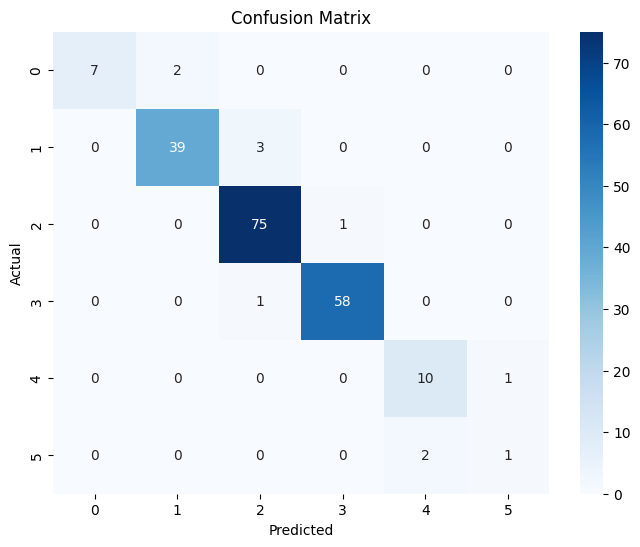

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=search.best_estimator_.classes_, yticklabels=search.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

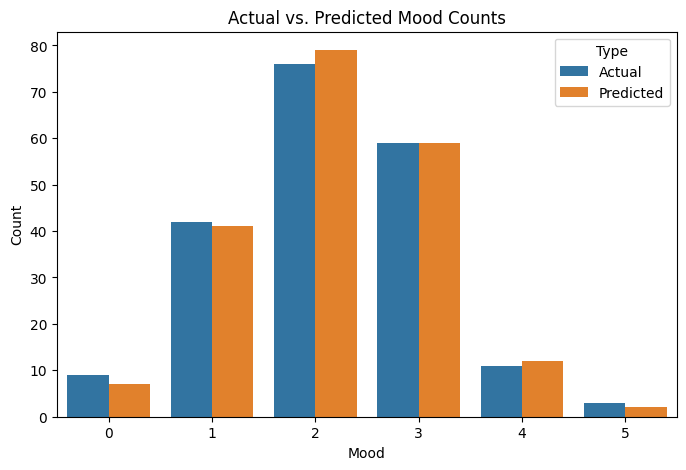

In [ ]:
stressed = pd.DataFrame({
    "Actual":   y_test,
    "Predicted": y_pred})

# Count of each class in actual vs. predicted
counts = stressed.melt(var_name="Type", value_name="Mood") \
           .groupby(["Type","Mood"]) \
           .size() \
           .reset_index(name="Count")

plt.figure(figsize=(8,5))
sns.barplot(data=counts, x="Mood", y="Count", hue="Type")
plt.title("Actual vs. Predicted Mood Counts")
plt.show()

In [ ]:
import pickle
with open("Mental_stress.pkl", "wb") as f:
    pickle.dump(search.best_estimator_, f)

In [ ]:
# Create a sample data point for prediction
sample_data = pd.DataFrame({
    'Gender': ['Female'],
    'Social Platform Preference': ['Instagram'],
    'Sleep Duration (hours/night)': [2.0],
    'Screen Time Before Sleep (hours)': [7.0],
    'Dominant Daily Emotion': ['Happy'],
    'Uses Focus Apps': [True],
    'Counselling Attendance': ['No'],
    'SME': [8.0],
    'sleep_to_screen_ratio': [9.0]
})

# Load the saved model
with open("Mental_stress.pkl", "rb") as f:
    loaded_model = pickle.load(f)

# Make a prediction on the sample data
prediction = loaded_model.predict(sample_data)

print(f"The predicted mental stress level is: {prediction[0]}")

The predicted mental stress level is: 1
